In [16]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Circle

In [28]:
def get_r(x,y):
    '''Get r from x and y.'''
    return np.sqrt(np.power(x,2) + np.power(y,2))

def plot_pattern(pattern, hex_id):
    fig,ax = plt.subplots(1,1,figsize = (9,9), dpi = 100)
    ax.set_title('Pattern interpolation\n(spline, k=3)')
    _x = np.arange(-80,80,0.5)
    _y = np.arange(-80,80,0.5)
    _xx,_yy = np.meshgrid(_x,_y, indexing='ij')
    _rr = get_r(_xx,_yy)
    _xx = _xx[_rr < 75]
    _yy = _yy[_rr < 75]
    _zz = pattern.ev(_xx,_yy)
    interpolated = ax.scatter(_xx, _yy, c=np.log10(_zz), marker = 's', s = 5,vmin = -6.2)

    ax.add_patch(Circle((0,0),75, color = 'r',fill = False, linewidth = 1, ls ='--'))
    ax.set_aspect('equal')
    fig.colorbar(interpolated, ax = ax)
    
    plt.savefig('figures/patterns/hex_v0_%d' %hex_id)

In [26]:
boop.ev(60,-60)

array(2.3053595e-15)

/tmp/jobs/19730792/ipykernel_520/1566456185.py:15: RuntimeWarning: divide by zero encountered in log10
  interpolated = ax.scatter(_xx, _yy, c=np.log10(_zz), marker = 's', s = 5,vmin = -6.2)
/tmp/jobs/19730792/ipykernel_520/1566456185.py:15: RuntimeWarning: invalid value encountered in log10
  interpolated = ax.scatter(_xx, _yy, c=np.log10(_zz), marker = 's', s = 5,vmin = -6.2)


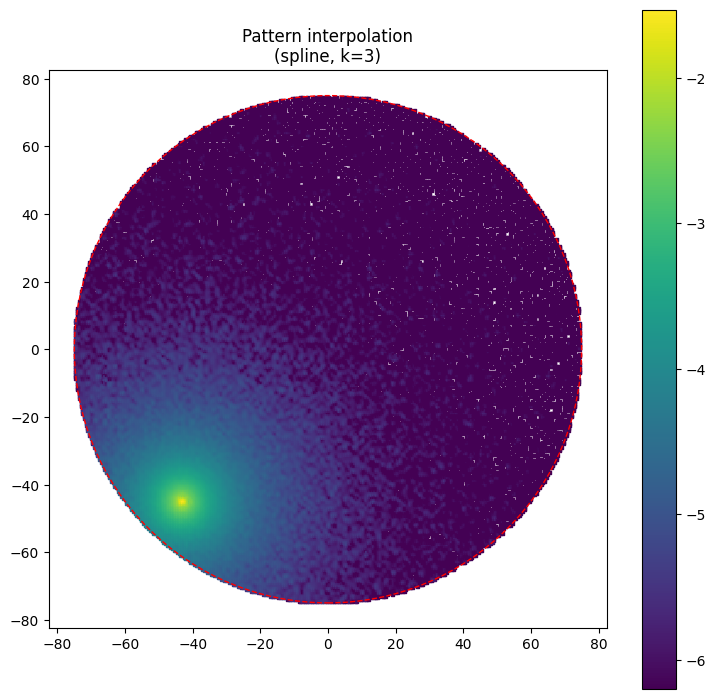

In [29]:
for hex_id in range(1):
    with open('patterns/hex_%d.pck'%hex_id, 'rb') as file:
        boop = pickle.load(file)
        
    plot_pattern(boop, hex_id)